In [1]:
!pwd

/home/saheed/research/optimize/SameVolumeCp2k


In [2]:
!ase db SameVolumePlusExact.db --csv --limit=0 > SameVolumePlusExact.csv

In [147]:
! pwd
! ase db /home/saheed/research/optimize/SameVolumeCp2k/SameVolumePlusExact.db -w


/home/saheed/research/optimize/SameVolumeCp2k

        You don't have jsmol on your system.

        Download Jmol-*-binary.tar.gz from
        https://sourceforge.net/projects/jmol/files/Jmol/,
        extract jsmol.zip, unzip it and create a soft-link:

            $ tar -xf Jmol-*-binary.tar.gz
            $ unzip jmol-*/jsmol.zip
            $ ln -s $PWD/jsmol /home/saheed/.local/lib/python3.8/site-packages/ase/db/static/jsmol
    
 * Serving Flask app 'ase.db.app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on all addresses.
 * Running on http://132.198.10.156:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (inotify)

        You don't have jsmol on your system.

        Download Jmol-*-binary.tar.gz from
        https://sourceforge.net/projects/jmol/files/Jmol/,
        extract jsmol.zip, unzip it and create a soft-link:

            $ tar -xf Jmol-*-binary.tar.gz
            $ unzip jmol-*/jsmol.zip
   

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.genfromtxt("SameVolumePlusExact.csv", delimiter=",", names=True)
#!head -n 5 optimized.out.csv


In [5]:
'''
mass = data[:, -1] * 1.66e-24
volume = data[:, -3] * 1e-24
energy = data[:, -7]
struc_id =  data[:, 0].astype(int)
density = mass/volume
'''


#data = np.delete(data, (78, 155, 161))
mass = data["mass"] * 1.66e-24
volume = data["volume"] * 1e-24
energy = data["energy"]
struc_id =  data["id"].astype(int)
density = mass/volume

In [6]:
len(density)

473

In [7]:
print(min(energy),max(energy))
print(min(done_energy),max(done_energy))

-5677.8318756262 -5664.0071041329


NameError: name 'done_energy' is not defined

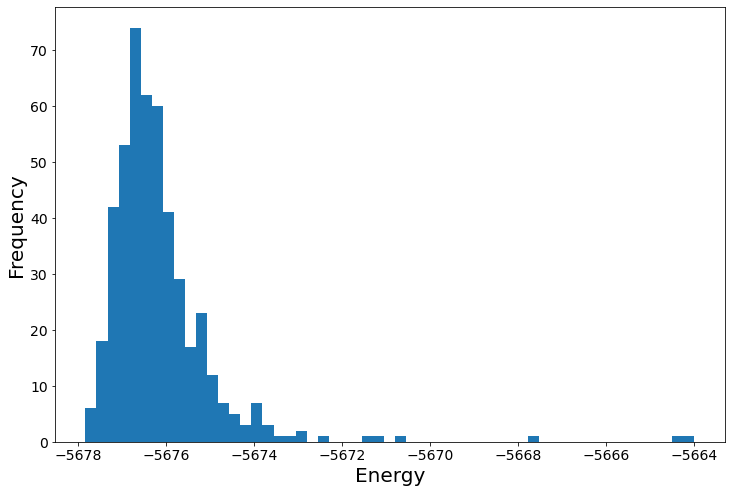

In [8]:
plt.figure(figsize=(12,8), )
plt.hist(energy, bins= "auto")
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.show()
#plt.savefig("Energy Hist.svg")


In [10]:
done = np.genfromtxt("done.csv", delimiter=",", names=True)

#data = np.delete(data, (78, 155, 161))
done_mass = done["mass"] * 1.66e-24
done_volume = done["volume"] * 1e-24
done_energy = done["energy"]
done_struc_id =  done["id"].astype(int)
done_density = done_mass/done_volume






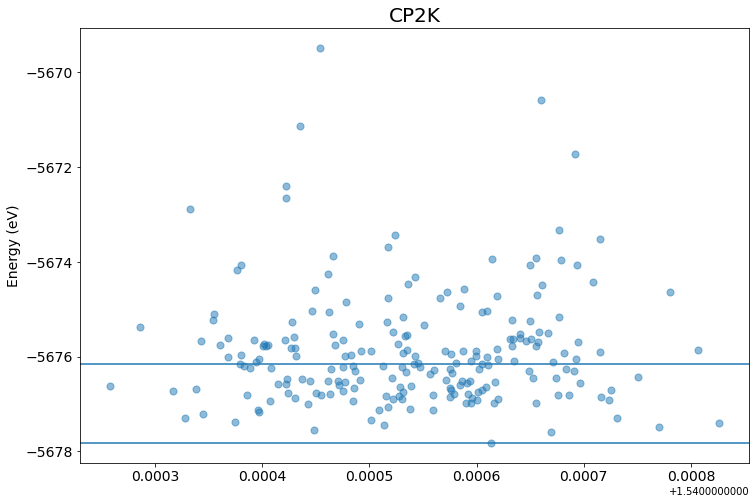

In [12]:
#cutoff = -5740
exact_energy =-5677.8318756262 
plt.figure(figsize=(12,8))
plt.title("Preliminary Landscape")
plt.scatter(done_density, done_energy, alpha=0.5, s=50)
plt.ylabel("Energy (eV)", fontsize=14)#plt.xlabel("Density (g/cm^3)", fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.title("CP2K", fontsize=20)
plt.axhline( exact_energy )
plt.axhline(-5676.1622958512)
#plt.axhline( cutoff )
#plt.savefig("Preliminary Land Scape.svg", format="svg")
#plt.savefig("Preliminary Land Scape.jpg")
plt.show()

In [139]:
exact_energy + 1.669579775

-5676.1622958512

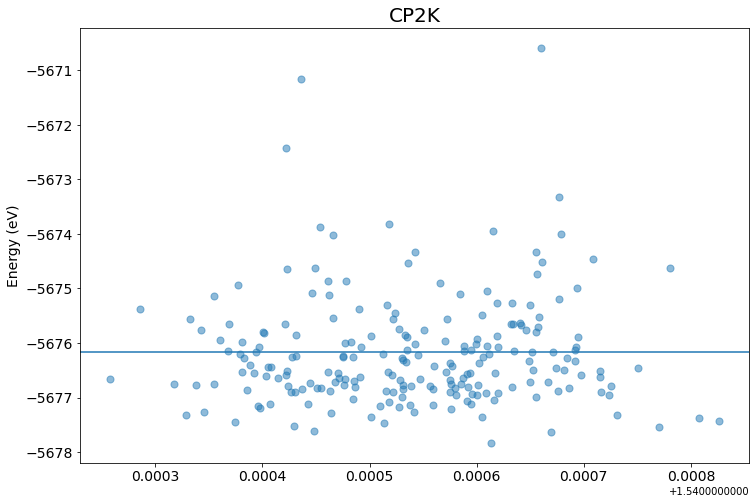

In [108]:
#cutoff = -5740
exact_energy =-5677.8318756262 
plt.figure(figsize=(12,8))
plt.title("Preliminary Landscape")
plt.scatter(density, energy, alpha=0.5, s=50)
plt.ylabel("Energy (eV)", fontsize=14)#plt.xlabel("Density (g/cm^3)", fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.title("CP2K", fontsize=20)
#plt.axhline( exact_energy + 1.669579775*0.75)
plt.axhline(-5676.1622958512)
#plt.axhline( cutoff )
#plt.savefig("Preliminary Land Scape.svg", format="svg")
#plt.savefig("Preliminary Land Scape.jpg")
plt.show()


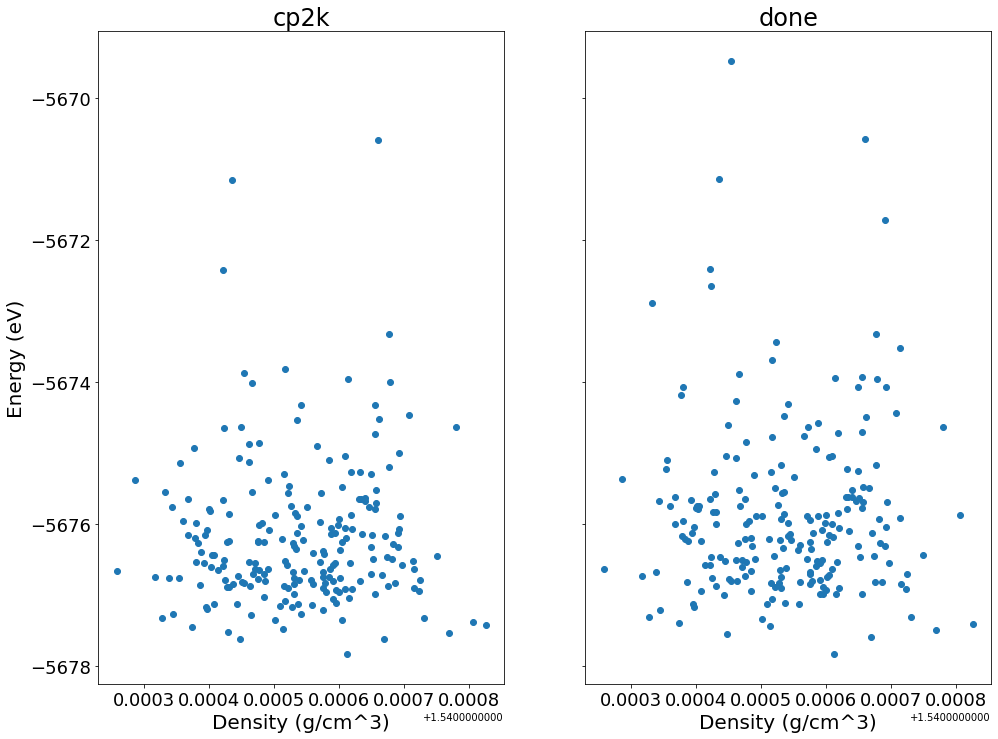

In [32]:
fig, ax = plt.subplots(1, 2, sharey = 'row', figsize = (16,12))
ax[0].scatter(density, energy)
ax[1].scatter(done_density, done_energy)
ax[0].set_ylabel("Energy (eV)", fontsize=20)
ax[0].set_xlabel("Density (g/cm^3)", fontsize=20)
ax[1].set_xlabel("Density (g/cm^3)", fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].set_title("done", fontsize=24)
ax[0].set_title("cp2k", fontsize=24)


plt.show()

In [13]:
done_structures = []
for i in range(len(done_mass)):
    done_structures.append( {"id":done_struc_id[i], "density": done_density[i], "energy":done_energy[i]})
len(done_structures)

212

In [14]:
structures = []
for i in range(len(mass)):
    structures.append( {"id":struc_id[i], "density": density[i], "energy":energy[i]})
    
len(structures)

473

In [15]:
structures = sorted(structures, key = lambda i: i['energy'])

In [16]:
structures

[{'id': 62, 'density': 1.5406133480704067, 'energy': -5677.8318756262},
 {'id': 309, 'density': 1.5405389813245818, 'energy': -5677.7038798669},
 {'id': 82, 'density': 1.5406695283511778, 'energy': -5677.6227062642},
 {'id': 86, 'density': 1.5404483773499598, 'energy': -5677.6118357741},
 {'id': 338, 'density': 1.5407047422917475, 'energy': -5677.5890308588},
 {'id': 351, 'density': 1.5406392675217675, 'energy': -5677.5838084197},
 {'id': 55, 'density': 1.5407698684142155, 'energy': -5677.529626146},
 {'id': 187, 'density': 1.5404295302598832, 'energy': -5677.5267212519},
 {'id': 339, 'density': 1.5403948632794362, 'energy': -5677.5011210967},
 {'id': 269, 'density': 1.5407744226949591, 'energy': -5677.5009270566},
 {'id': 181, 'density': 1.540513712184129, 'energy': -5677.4734580548},
 {'id': 295, 'density': 1.5404172098090843, 'energy': -5677.4623700316},
 {'id': 371, 'density': 1.5405602956721434, 'energy': -5677.4522494372},
 {'id': 128, 'density': 1.5403747025812011, 'energy': -56

In [23]:
print([stru["id"] for stru in structures][:100])


[62, 309, 82, 86, 338, 351, 55, 187, 339, 269, 181, 295, 371, 128, 240, 404, 19, 394, 310, 131, 414, 8, 56, 361, 45, 27, 283, 335, 307, 167, 188, 462, 401, 191, 272, 225, 304, 282, 262, 226, 136, 92, 118, 38, 280, 387, 161, 259, 465, 222, 456, 168, 370, 124, 286, 378, 221, 104, 29, 281, 192, 340, 359, 345, 197, 343, 433, 169, 94, 397, 297, 12, 334, 434, 354, 220, 391, 412, 323, 377, 105, 305, 174, 349, 252, 153, 30, 425, 98, 292, 228, 396, 216, 264, 66, 74, 106, 80, 196, 17]


In [64]:
def select_struc( cut_off_energy, structures):
    selected = []
    #for i in range(len(mass)):
    #    structures.append( {"id":struc_id[i], "density": density[i], "energy":energy[i]})
    #    selected =[]
    for struc in (structures):/home/saheed/research/optimize/SameVolumeCp2k/
        if struc["energy"] <= cut_off_energy:
            selected.append(struc)
    return selected

In [100]:
selected_structures = select_struc( -5676.1622958512, structures)
print(len(selected_structures))
done_selected_structures = select_struc( -5676.1622958512, done_structures)
print(len(done_selected_structures))


128
101


In [141]:
selected_structures = sorted(selected_structures, key = lambda i: i['energy'])
#done_selected_structures = sorted(done_selected_structures, key = lambda i: i['energy'])

In [143]:
len(selected_structures)

128

In [102]:
selected_id = [struc["id"] for struc in selected_structures]
done_selected_id = [struc["id"] for struc in done_selected_structures]
common_struc = set(selected_id).intersection(set(done_selected_id))
len(common_struc)

64

In [107]:
print(selected_structures[-1])
print(done_selected_structures[-1])
print("\n")
print(selected_structures[0])
print(done_selected_structures[0])

{'id': 37, 'density': 1.540671559562143, 'energy': -5676.1695512121}
{'id': 51, 'density': 1.5403787970637455, 'energy': -5676.1643702154}


{'id': 62, 'density': 1.5406133480704067, 'energy': -5677.8318756262}
{'id': 57, 'density': 1.5406133480704067, 'energy': -5677.826303372}


In [89]:
for i, struc in enumerate(done_selected_structures):
    #print(i, struc)
    if struc["id"] in selected_structures[i].values():
        print(yes)


In [75]:
selected_structures.item

AttributeError: 'list' object has no attribute 'item'

In [ ]:
energy_sorted_structures = sorted(structures, key = lambda i: i['energy'])

In [ ]:
energy_sorted_structures

In [ ]:
print(type(selected_structures))

print(type(selected_structures[2]))

In [ ]:
density_ = [ x["density"] for x in sorted_structures]
energy_ = [ x["energy"] for x in sorted_structures]

struc_with_energy = -5759.506420634754
plt.figure(figsize=(12,8))
plt.title("refined Landscape")
plt.scatter(density_, energy_, s=100)
plt.ylabel("Energy (eV)")
plt.xlabel("Density (g/cm^3)")
#plt.axhline(struc_with_energy )
#plt.savefig("Preliminary Land Scape.svg", format="svg")
#plt.savefig("Preliminary Land Scape.jpg")
plt.show()
for struc in sorted_structures:
    print(struc)

In [ ]:
possible =[]
for struc in sorted_structures:
    possible.append(struc["id"])
print(possible)

In [ ]:
torchani_data = np.genfromtxt("/home/saheed/research/optimize/compression_graph/torchani2x/220btbt/cp2k_vs_ANI2x.dat", delimiter=",", names=True)

#torchani_data = np.genfromtxt("torchani.csv", delimiter=",", names=True)
mass_ani = torchani_data["mass"] * 1.66e-24
volume_ani = torchani_data["volume"] * 1e-24
energy_ani = torchani_data["energy"]
struc_id_ani =  torchani_data["id"].astype(int)
density_ani = mass_ani/volume_ani

In [ ]:
plt.figure(figsize=(12,8), )
plt.hist(energy_ani, bins= "auto")
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.show()
#plt.savefig("Energy Hist.svg")


In [ ]:
len(energy_ani)

In [ ]:
#cutoff = -5740
plt.figure(figsize=(12,8))
plt.title("Preliminary Landscape")
plt.scatter(density_ani, energy_ani)
plt.ylabel("Energy (eV)", fontsize=14)
plt.xlabel("Density (g/cm^3)", fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
#plt.axhline( cutoff )
#plt.savefig("Preliminary Land Scape.svg", format="svg")
#plt.savefig("Preliminary Land Scape.jpg")
plt.show()

In [ ]:
len(energy_ani)

In [ ]:
!pwd


In [ ]:

fig, ax = plt.subplots(1, 2, sharey = 'row', figsize = (20,14))
ax[0].scatter(density_ani, energy_ani)
ax[1].scatter(density, energy)
ax[0].set_ylabel("Energy (eV)", fontsize=20)
ax[0].set_xlabel("Density (g/cm^3)", fontsize=20)
ax[1].set_xlabel("Density (g/cm^3)", fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].set_title("cp2k", fontsize=24)
ax[0].set_title("Torchani", fontsize=24)


plt.show()

In [ ]:
len(energy)


In [ ]:
len(energy_ani)

In [ ]:
plt.plot(energy, energy, ".")
#plt.xlim((-5000,0))
#plt.ylim((-5000,0))
plt.show()
plt.plot(energy_ani, energy_ani, ".")
#plt.xlim((-5000,0))
#plt.ylim((-5000,0))
#plt.scatter(energy, energy_ani)
plt.show()

In [ ]:
cp2k_structures = []
for i in range(len(mass)):
    cp2k_structures.append( {"id":struc_id[i], "density": density[i], "energy":energy[i]})

In [ ]:
ani2_structures = []
for i in range(len(mass_ani)):
    ani2_structures.append( {"id":struc_id_ani[i], "density": density_ani[i], "energy":energy_ani[i]})

In [ ]:
cp2k_structures_sorted = sorted(cp2k_structures, key = lambda i: i['energy'])
ani2_structures_sorted = sorted(ani2_structures, key = lambda i: i['energy'])

In [ ]:
cp2k_structures_sorted


In [ ]:
ani2_structures_sorted

In [ ]:
!pwd


In [ ]:
!pwd